In [1]:
# 필요 라이브러리 선언
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

C:\Users\user\AppData\Local\Temp\ipykernel_11644\1606399738.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


In [3]:
import pandas as pd
import numpy as np

# 데이터 로드
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
yt = raw_df.values[1::2, 2]

# 컬럼 이름 정의
feature_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
    'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]

# RM 특성 추출
rm_index = feature_names.index('RM')
x_data = data[:, rm_index].reshape(-1, 1)
print("RM 데이터:", x_data.shape)

# 더미 변수 추가
x = np.insert(x_data, 0, 1.0, axis=1)
print("더미 변수 추가 후의 RM 데이터:", x.shape)

RM 데이터: (506, 1)
더미 변수 추가 후의 RM 데이터: (506, 2)


In [4]:
# 입력 데이터 x를 표시 (더미 변수 포함)
print(x.shape)
print(x[:5,:])


(506, 2)
[[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 [1.    6.998]
 [1.    7.147]]


In [5]:
# 정답값 yt를 표시
print(yt[:5])

[24.  21.6 34.7 33.4 36.2]


In [6]:
def pred(x, w):
    return (x @ w)


In [7]:
M = x.shape[0]
D = x.shape[1]
iters = 50000
alpha = 0.01
w = np.ones(D)
history = np.zeros((0,2))

In [8]:
#반복루프
for k in range(iters):
    #예측값계산
    yp = pred(x,w)
    #오차 계산
    yd = yp - yt
    #경사하강법 적용
    w = w-alpha *(x.T @ yd)/M
    #학습 곡선을 그리기 위한 데이터 계산 및 저장
    if (k % 100 ==0):
        loss = np.mean(yd **2)/2
        history = np.vstack((history, np.array([k,loss])))
        print("iter =%d loss = %f" % (k, loss))
    


iter =0 loss = 154.224934
iter =100 loss = 29.617518
iter =200 loss = 29.431766
iter =300 loss = 29.250428
iter =400 loss = 29.073399
iter =500 loss = 28.900577
iter =600 loss = 28.731861
iter =700 loss = 28.567154
iter =800 loss = 28.406360
iter =900 loss = 28.249388
iter =1000 loss = 28.096145
iter =1100 loss = 27.946544
iter =1200 loss = 27.800498
iter =1300 loss = 27.657922
iter =1400 loss = 27.518733
iter =1500 loss = 27.382852
iter =1600 loss = 27.250200
iter =1700 loss = 27.120700
iter =1800 loss = 26.994277
iter =1900 loss = 26.870858
iter =2000 loss = 26.750372
iter =2100 loss = 26.632749
iter =2200 loss = 26.517921
iter =2300 loss = 26.405821
iter =2400 loss = 26.296385
iter =2500 loss = 26.189549
iter =2600 loss = 26.085252
iter =2700 loss = 25.983433
iter =2800 loss = 25.884034
iter =2900 loss = 25.786997
iter =3000 loss = 25.692265
iter =3100 loss = 25.599784
iter =3200 loss = 25.509501
iter =3300 loss = 25.421363
iter =3400 loss = 25.335320
iter =3500 loss = 25.251320
ite

In [9]:
#최종 손실함수 초깃값, 최종값
print('손실함수 초깃값: %f' % history[0,1])

손실함수 초깃값: 154.224934


In [10]:
print('손실함수 최종값: %f' % history[-1,1])

손실함수 최종값: 21.800325


In [11]:
#그래프 좌표값 계산
xall = x[:,1].ravel()
x1 = np.array([[1, xall.min()], [1, xall.max()]])
y1 = pred(x1,w)
print(x1)

[[1.    3.561]
 [1.    8.78 ]]


In [12]:
print(xall)

[6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813
 5.924 5.599 5.813 6.047 6.495 6.674 5.713 6.072 5.95  5.701 6.096 5.933
 5.841 5.85  5.966 6.595 7.024 6.77  6.169 6.211 6.069 5.682 5.786 6.03
 5.399 5.602 5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927
 5.741 5.966 6.456 6.762 7.104 6.29  5.787 5.878 5.594 5.885 6.417 5.961
 6.065 6.245 6.273 6.286 6.279 6.14  6.232 5.874 6.727 6.619 6.302 6.167
 6.389 6.63  6.015 6.121 7.007 7.079 6.417 6.405 6.442 6.211 6.249 6.625
 6.163 8.069 7.82  7.416 6.727 6.781 6.405 6.137 6.167 5.851 5.836 6.127
 6.474 6.229 6.195 6.715 5.913 6.092 6.254 5.928 6.176 6.021 5.872 5.731
 5.87  6.004 5.961 5.856 5.879 5.986 5.613 5.693 6.431 5.637 6.458 6.326
 6.372 5.822 5.757 6.335 5.942 6.454 5.857 6.151 6.174 5.019 5.403 5.468
 4.903 6.13  5.628 4.926 5.186 5.597 6.122 5.404 5.012 5.709 6.129 6.152
 5.272 6.943 6.066 6.51  6.25  7.489 7.802 8.375 5.8

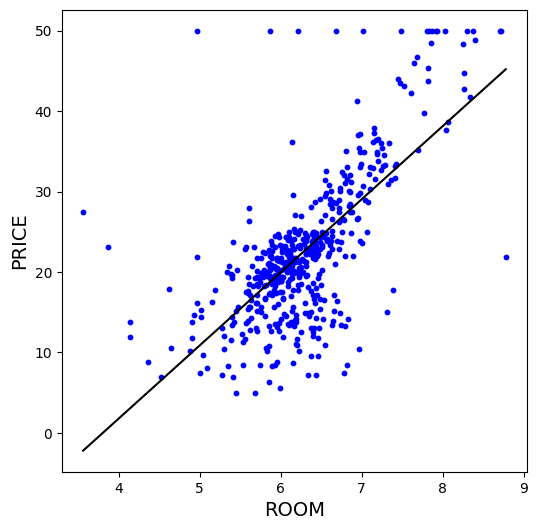

In [13]:
#산점도와 회귀 직선 그리기
plt.figure(figsize = (6,6))
plt.scatter(x[:,1], yt, s=10, c='b')
plt.xlabel('ROOM', fontsize = 14)
plt.ylabel('PRICE', fontsize = 14)
plt.plot(x1[:,1],y1, c='k')
plt.show()

In [14]:
LSTAT_index = feature_names.index('LSTAT')
x_add = data[:, LSTAT_index].reshape(-1, 1)

In [15]:
x2 = np.hstack((x,x_add))

In [16]:
x2

array([[1.   , 6.575, 4.98 ],
       [1.   , 6.421, 9.14 ],
       [1.   , 7.185, 4.03 ],
       ...,
       [1.   , 6.976, 5.64 ],
       [1.   , 6.794, 6.48 ],
       [1.   , 6.03 , 7.88 ]])

In [17]:
x2.shape

(506, 3)

In [18]:
#데이터 전체건수
M = x2.shape[0]

In [19]:
#입력 데이터의 차원 수(더미 변수 포함)
D = x2.shape[1]

In [20]:
#반복횟수
iters = 2000

In [21]:
#학습률
alpha = 0.001

In [29]:
#가중치 벡터의 초깃값(모든 값을 1로 한다.)y = w 506*3
w = np.ones(D)


In [28]:
#평가 결과 기록(손실함숫값만 기록)
history = np.zeros((0,2))

In [30]:
#반복 루프
for k in range(iters):
  #예측값 계산
  yp = pred(x2, w)
  #오차 계산
  yd = yp-yt
  #경사하강법 적용
  w = w -alpha * (x2.T @ yd) / M
  if k % 100 == 0:
  #손실함숫값의 계산
    loss = np.mean(yd ** 2)/2
    history = np.vstack((history, np.array([k,loss])))
    print("iter = %d loss =%f" % (k, loss))
  

iter = 0 loss =112.063982
iter = 100 loss =25.358934
iter = 200 loss =16.391055
iter = 300 loss =15.403015
iter = 400 loss =15.294135
iter = 500 loss =15.282114
iter = 600 loss =15.280764
iter = 700 loss =15.280589
iter = 800 loss =15.280544
iter = 900 loss =15.280514
iter = 1000 loss =15.280485
iter = 1100 loss =15.280456
iter = 1200 loss =15.280428
iter = 1300 loss =15.280399
iter = 1400 loss =15.280371
iter = 1500 loss =15.280342
iter = 1600 loss =15.280314
iter = 1700 loss =15.280285
iter = 1800 loss =15.280257
iter = 1900 loss =15.280228


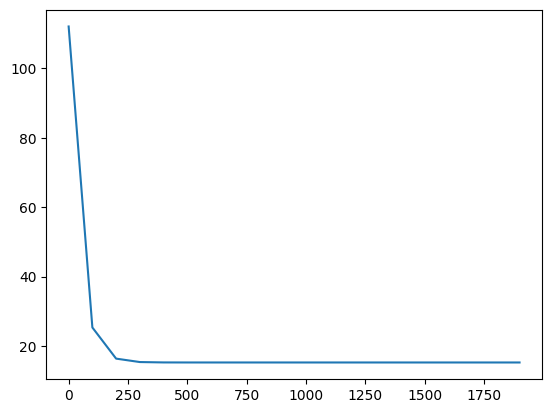

In [31]:
plt.plot(history[:,0],history[:,1])
plt.show()